## Name: Aditya Sai Chinnathambi Narayanan (230336355)
## The project I attempted was: (1) Tabular

# CSC8111 Coursework Specification

For this coursework you will perform **THREE** short questions which cover the breadth of the machine learning module along with attempting **ONE** of the four longer project-style questions. All of the short tasks and longer project-style questions can be found in this notebook. You should provide all of your answers in this notebook and submit it to Canvas before the submission deadline.

The learning objectives of these short questions are:
- To demonstrate a wide-range of machine learning skills.
- To be able to apply the most appropriate approach at the right time.



---
## Question 1: Classification (10 marks)

Load the dataset below, where X and y are the feature (input) variables and target (output) variable. Based on this dataset, build TWO classifiers using different machine learning approaches to predict the two classes in the target variable. You are free to use any appropriate machine learning models and libraries, but you need to split the dataset into training and test sets and optimise the model's hyperparameters (e.g. using GridSearchCV()). As a result, the performance metrics of the best classifier should be reported over the test set. Please follow the steps below to complete the code.

The dataset is available at:
https://ncl.instructure.com/courses/53509/files/7659751?wrap=1 and
https://ncl.instructure.com/courses/53509/files/7659755?wrap=1


## Set up the environment and load the dataset

In [ ]:
# just run this cell, don't change the code
import numpy as np
from numpy import loadtxt
X = loadtxt('cls_X.csv', delimiter=',')
y = loadtxt('cls_y.csv', delimiter=',')

## Q1.1 Split the data into training and test sets (20% for testing)

In [ ]:
!pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# write your code below to replace the ellipsis "..."
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Q1.2 Create your first classifier

#### Q1.2.1 First, make an attempt by using an appropriate machine learning method without optimising the hyperparameter(s). Report the model accuracy over the test set (i.e. test accuracy).

In [ ]:
# write your code below to replace the ellipsis "..."
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8875


#### Q1.2.2 Then, optimise the hyperparameter(s) using the same machine learning method as above. Report the best hyperparameter(s) and, use it to make your first classifier and print out its test accuracy.

In [ ]:
# write your code below to replace the ellipsis "..."
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100]}

grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)

best_svm = SVC(C=best_params['C'])
best_svm.fit(X_train, y_train)

y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

{'C': 10}
0.9


## Q1.3 Create your second classifier

#### Q1.3.1 First, without optimising the hyperparameter(s), make an attempt by using a different machine learning method to the first classifier. Report the model accuracy over the test set (i.e. test accuracy).

In [ ]:
# write your code below to replace the ellipsis "..."
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNeighbors = KNeighborsClassifier()
KNeighbors.fit(X_train, y_train)
y_pred = KNeighbors.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.875


#### Q1.3.2 Then, optimise the hyperparameter(s) using the same machine learning method as above. Report the best hyperparameter(s) and, use it to make your second classifier and print out its test accuracy.



In [ ]:
# write your code below to replace the ellipsis "..."
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2],
              }

grid_search = GridSearchCV(KNeighbors, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)

best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

{'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
0.8875


## Q1.4 Report the precision, recall, f1 score and confusion matrix on the best of the two classifiers

In [ ]:
# write your code below to replace the ellipsis "..."
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print(f"\nEvaluation metrics :")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")


Evaluation metrics :
Precision: 0.8901
Recall: 0.8875
F1 Score: 0.8876
Confusion Matrix:
[[36  6]
 [ 3 35]]


---
## Question 2: Regression (10 marks)

In this question you are given a simple dataset which you will perform regression on to predict values. You will build TWO Regression models and then take the best one and perform hyperparameter tuning on it.

## Set up the environment

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

## Read in the data

You'll need to download the data.csv file from https://ncl.instructure.com/courses/53509/files/7657710?wrap=1 and upload it to your Google Drive. I placed it in a folder called data. Then you need to mount your Google Drive in Colab (cell below).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Then read in the data

In [ ]:
data = np.loadtxt('/content/drive/MyDrive/data/data.csv', delimiter=',')
print(data)

[[1.00000000e+00 9.00000000e+00 2.57259990e+00 2.49788633e+02]
 [1.00000000e+00 5.00000000e+00 9.21413366e+00 5.04502032e+02]
 [1.00000000e+00 1.70000000e+01 7.12330090e+00 1.33580225e+03]
 ...
 [5.00000000e+00 3.10000000e+01 6.80121067e+00 3.15979690e+03]
 [5.00000000e+00 1.00000000e+01 4.14995662e+00 6.21315789e+02]
 [5.00000000e+00 9.00000000e+00 9.61878173e+00 1.30105857e+03]]


## Q2.1 Split the data into X and y

X is the first three columns

y is the last column

In [ ]:
# your answer here
X = data[:, :3]
y = data[:, 3]

## Q2.2 Create the Train and Test datasets

20% of the data is kept back for testing

In [ ]:
# your answer here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Q2.3 Use TWO Regression approaches on the dataset

In each case report the R^2 value against the test data.

Q2.3.1 Regression approach 1

In [ ]:
# your answer here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_linear_pred = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_linear_pred)
print("R^2 value for Linear Regression: ", r2_linear)

R^2 value for Linear Regression:  0.8258684728620593


Q2.3.2 Regression approach 2

In [ ]:
# your answer here
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_rf_pred)
print("R^2 value for Random Forest Regression: ", r2_rf)

R^2 value for Random Forest Regression:  0.994686023146547


## Q2.4 Optimise the hyperparameters

Take your best Regression approach from above and identify the best hyperparameters. Note as some Regression approaches have many hyperparameters you may limit yourself here to just THREE.

Q2.4.1 Search for the best hyperparameters

In [ ]:
# your answer here
# Based on the R^2 score on the 2 regression models above, we have selected the model which has the best r^2 score that is the Random Forest Regression model.

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [50, 100, 150, 200],
    'max_depth' : [None, 5, 10, 15, 20],
    'min_samples_split' : [2, 5, 10, 15]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

Q2.4.2 Output the best hyperparameters found

In [ ]:
# your answer here
print("Best Hyperparameters for Random Forest Regression: ", best_params)

Best Hyperparameters for Random Forest Regression:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


Q2.4.3 Show the results for the best model

In [ ]:
# your answer here
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

y_best_rf_pred = best_rf_model.predict(X_test)
r2_best_rf = r2_score(y_test, y_best_rf_pred)

print("R^2 value for optimized Random Forest Regression: ", r2_best_rf)

R^2 value for optimized Random Forest Regression:  0.9951280690925833


---
## Question 3: Deep Learning (10 marks)

Q3.1 For MNIST dataset, implement a deep learning model with 3 hidden layers with layer size: 128, 256, 50.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.datasets import mnist
import keras.utils as utils

batch_size = 128
nb_classes = 10
im_dim = 784 # the total pixel number
nb_epoch = 2

In [ ]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, im_dim)
X_test = X_test.reshape(10000, im_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Write down your code about MLP model for question Q3.1 here
# you should call your model 'model'

model = Sequential()

model.add(Dense(128, input_shape=(im_dim,), activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(50, activation='relu'))

model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Add code to output your network structure

In [ ]:
# your code here
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dense_8 (Dense)             (None, 50)                12850     
                                                                 
 dense_9 (Dense)             (None, 10)                510       
                                                                 
Total params: 146864 (573.69 KB)
Trainable params: 146864 (573.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model for just two epochs to show it works. All code provided - just run.

In [ ]:
history = model.fit(X_train, Y_train, epochs=nb_epoch,
                    validation_split = 0.2,
                    batch_size=batch_size, verbose=1)

evaluation = model.evaluate(X_test, Y_test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

Epoch 1/2
375/375 [==============================] - 8s 18ms/step - loss: 0.3450 - accuracy: 0.8975 - val_loss: 0.1727 - val_accuracy: 0.9471
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.1165 - accuracy: 0.9645
Summary: Loss over the test dataset: 0.12, Accuracy: 0.96


Q 3.2 For MNIST dataset, implement a CNN model with only one 2D CNN layer as the hidden layer.

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 2

(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# Write down your code about the CNN model of Q3.2 here
# you should call your model 'model'

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Add code to output your network structure

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               692352    
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

We just train for two epochs to demonstrate that the network does work. Just run it.

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
              verbose=1, shuffle=True,
              validation_split = 0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (score[0], score[1]))

Epoch 1/2
375/375 [==============================] - 26s 65ms/step - loss: 0.2519 - accuracy: 0.9285 - val_loss: 0.0957 - val_accuracy: 0.9728
Epoch 2/2
375/375 [==============================] - 26s 69ms/step - loss: 0.0786 - accuracy: 0.9760 - val_loss: 0.0861 - val_accuracy: 0.9743
Summary: Loss over the test dataset: 0.07, Accuracy: 0.98


---
---
---
#Mini-projects: Introduction

The remainder of this document defines four project-style questions which go more deeply into one of the areas from the module. You should pick **ONE** of these project-stye questions to answer.

The learning objectives of this assignment are:
1. To learn about the design of machine learning analysis pipelines
2. To understand how to select appropriate methods given the dataset type
3. To learn how to conduct machine learning experimentation in a rigorous and effective manner
4. To critically evaluate the performance of the designed machine learning pipelines
5. To learn and practice the skills of reporting machine learning experiments

For this coursework you will be provided with a choice of four different datasets of different nature
1. A tabular dataset (defined as a classification problem)
2. An image dataset
3. A text dataset
4. A time series dataset

Your job is easy to state: You should pick ONE out of these four options and design a range of machine learning pipelines appropriate to the nature of each of the selected datasets. Overall, we expect that you will perform a thorough investigation involving (whenever relevant) all parts of a machine learning pipeline (exploration, preprocessing, model training, model interpretation and evaluation), evaluating a range of options for all parts of the pipeline and with proper hyperparameter tuning.

You will have to write a short report (as part of this notebook) that presents the experiments you did, their justification, a detailed description of the performance of your designed pipelines using the most appropriate presentation tools (e.g., tables of results, plots). We expect that you should be able to present your work at a level of detail that would enable a fellow student to reproduce your steps.

## Deliverables
An inline report and code blocks addressing the marking scheme below. The report should have 1000 to 2000 words. The word count excludes references, tables, figures and section headers, and has a 10% leeway.

## Marking scheme

- Writing Style, references, figures, etc. 7 marks
- Dataset exploration 7 marks
- Methods 21 marks
- Results of analysis 21 marks
- Discussion 14 marks

---
---
## Project 1: Tabular dataset (70 marks)

The dataset, called FARS, is a collection of statistics of US road traffic accidents. The class label is about the severity of the accident. It has 20 features and over 100K examples. The dataset is available in Canvas as a CSV file, in which the last column contains the class labels: https://ncl.instructure.com/courses/53509/files/7652449/download?download_frd=1

Experiments on the tabular dataset will be relatively fast compared to the other three options. To compensate, we expect that you evaluate a very broad range of options for the design of your machine learning pipelines, including (but not limited to) data normalisation, feature/instance selection, class imbalance correction, several (appropriate) machine learning models, hyperparameter tuning and cross-validation evaluation.

## Your answer below

## Importing the dataset

You may need to upload the dataset to Google drive and place it in a folder called 'fars-dataset'.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading the dataset from Google drive, and creating a dataframe using pandas library.

In [1]:
import pandas as pd

dataset_path = '/content/drive/MyDrive/fars-dataset/fars.csv'
df = pd.read_csv(dataset_path)

## Exploratory Data Analysis

Performing EDA(Exploratory Data Analysis) on the dataset, exploring its characteristics, visualizing the age distribution, and analyzing the relationship between age and injury severity.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100968 entries, 0 to 100967
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   CASE_STATE                           100968 non-null  object
 1   AGE                                  100968 non-null  int64 
 2   SEX                                  100968 non-null  object
 3   PERSON_TYPE                          100968 non-null  object
 4   SEATING_POSITION                     100968 non-null  object
 5   RESTRAINT_SYSTEM-USE                 100968 non-null  object
 6   AIR_BAG_AVAILABILITY/DEPLOYMENT      100968 non-null  object
 7   EJECTION                             100968 non-null  object
 8   EJECTION_PATH                        100968 non-null  object
 9   EXTRICATION                          100968 non-null  object
 10  NON_MOTORIST_LOCATION                100968 non-null  object
 11  POLICE_REPORTED_ALCOHOL_IN

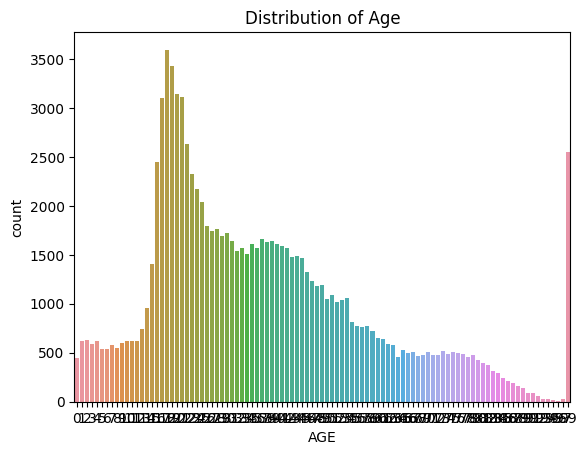

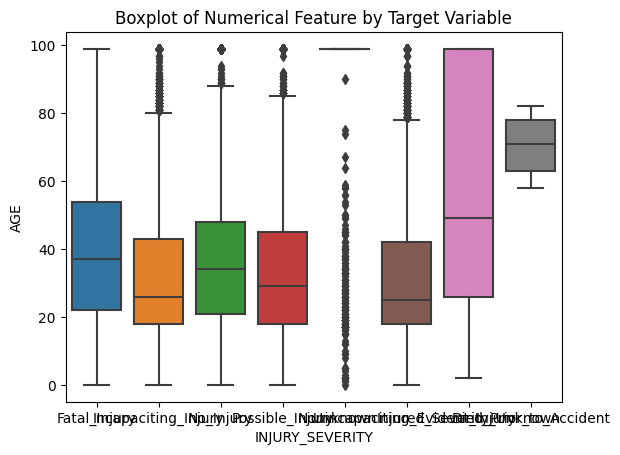

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())

print(df.describe())

sns.countplot(x='AGE', data=df)
plt.title('Distribution of Age')
plt.show()

sns.boxplot(x='INJURY_SEVERITY', y='AGE', data=df)
plt.title('Boxplot of Numerical Feature by Target Variable')
plt.show()

## Data Preprocessing

Dropping the duplicate rows that are present in the dataset.

In [3]:
df = df.drop_duplicates()

df

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,Alabama,34,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Available_but_Not_Deployed_for_this_Seat,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
1,Alabama,20,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Deployed_Air_Bag_from_Front,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
2,Alabama,43,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
3,Alabama,38,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
4,Alabama,50,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Deployed_Air_Bag_from_Front,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100963,Wyoming,10,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Left_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Possible_Injury
100964,Wyoming,9,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Possible_Injury
100965,Wyoming,7,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Middle,Lap_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Possible_Injury
100966,Wyoming,4,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Middle,Lap_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Te

Splitting the dataset into independent variables(Denoted as X) and dependent variable(Denoted as Y)

In [4]:
X = df.drop('INJURY_SEVERITY', axis=1)
y = df['INJURY_SEVERITY']

In this step, we are applying one-hot encoding to the columns that contain non-integer fields. One-hot encoding is a technique used to convert categorical variables into a format that can be provided to machine learning algorithms to improve predictions.

In [5]:
# encoding the independent variables using one hot encoding
independent = ['CASE_STATE', 'SEX', 'PERSON_TYPE', 'SEATING_POSITION', 'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION', 'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION','POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION', 'ALCOHOL_TEST_TYPE', 'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION', 'DRUG_TEST_TYPE_(1_of_3)', 'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_TYPE_(3_of_3)', 'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL', 'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RELATED_FACTOR_(2)-PERSON_LEVEL', 'RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE']

X = pd.get_dummies(X, columns=independent, drop_first=True)

In this step, we are performing label encoding on the dependent variable. Label encoding is a technique used to convert categorical labels into numerical format, which is required by many machine learning algorithms.


In [6]:
from sklearn.preprocessing import LabelEncoder

# label encoding the dependent value
target_variable = 'INJURY_SEVERITY'

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y = label_encoder.fit_transform(y)

Converting our dataset features and labels into NumPy arrays. NumPy arrays provide efficient and convenient structures for numerical operations and are commonly used in machine learning workflows.

In [7]:
import numpy as np

# convert it into an array
X = np.asarray(X)
y = np.asarray(y)

Performing feature selection to our dataset using the `SelectKBest` method from scikit-learn. Feature selection is a crucial step in building machine learning models to identify the most relevant features and improve model performance.

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=200)
X_selected = selector.fit_transform(X, y)

We are dividing our dataset into training and test sets. This is a fundamental step in machine learning to evaluate the performance of our models on unseen data.

In [9]:
from sklearn.model_selection import train_test_split

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We are normalizing our dataset using the `MinMaxScaler` from scikit-learn. Normalization is a preprocessing technique that scales the features to a specific range, often [0, 1], making them comparable and avoiding dominance by features with larger scales.


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

Performing the Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance in our dataset. SMOTE generates synthetic samples for the minority class to achieve a more balanced distribution.

In [11]:
from imblearn.over_sampling import SMOTE

# Resampling the data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_normalized, y_train)

## Creating the environment

Importing the required libraries to run varies machine learning models

In [12]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

## XGBoost Classifier

Training an XGBoost Classifier on the resampled training set and evaluating its accuracy on the test set.

XGBoost Accuracy: 79.15%
Cross-Validation Scores: [0.81272793 0.8350764  0.83875343 0.83777389]
Average Accuracy: 83.11%


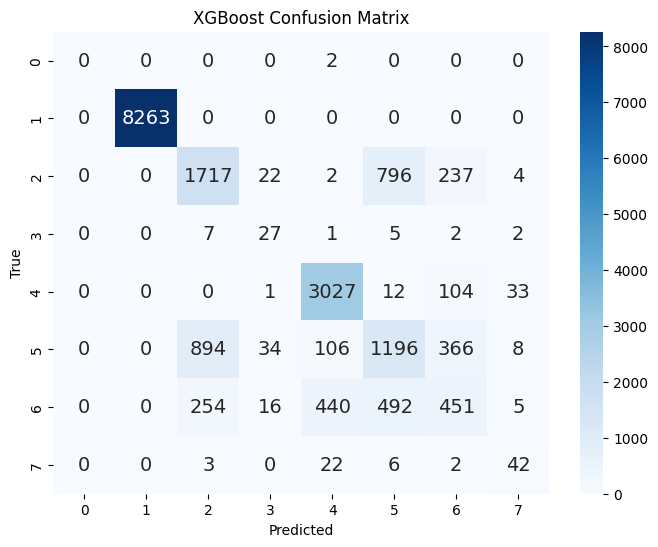

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       1.00      1.00      1.00      8263
           2       0.60      0.62      0.61      2778
           3       0.27      0.61      0.38        44
           4       0.84      0.95      0.89      3177
           5       0.48      0.46      0.47      2604
           6       0.39      0.27      0.32      1658
           7       0.45      0.56      0.50        75

    accuracy                           0.79     18601
   macro avg       0.63      0.56      0.52     18601
weighted avg       0.78      0.79      0.78     18601



In [15]:
# XGBoost Classifier
from xgboost import XGBClassifier

# Create the XGBclassifier
model = XGBClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test_normalized)

accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = "{:.2%}".format(accuracy)
print(f'XGBoost Accuracy: {formatted_accuracy}')

# Cross-validation
cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=4, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

average_accuracy = cv_scores.mean()
print("Average Accuracy:", "{:.2%}".format(average_accuracy))

conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

class_report_rf = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", class_report_rf)

We are performing hyperparameter tuning for the XGBoost Classifier using GridSearchCV and evaluating its accuracy on the test set. Additionally, we explore the model's performance through cross-validation.

Best Hyperparameters: {'colsample_bytree': 0.4, 'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 900}
XGBoost with hyperparameter tuning accuracy: 80.23%
Cross-Validation Scores: [0.7981283  0.81323774 0.81977358 0.82164528]
Average Accuracy: 81.32%


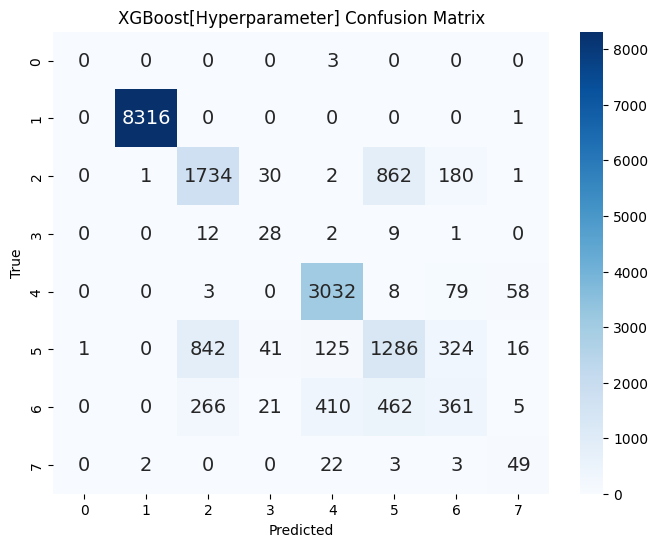

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      1.00         3
           1       1.00      1.00      1.00      8317
           2       0.61      0.62      0.61      2810
           3       0.23      0.54      0.33        52
           4       0.84      0.95      0.89      3180
           5       0.49      0.49      0.49      2635
           6       0.38      0.24      0.29      1525
           7       0.38      0.62      0.47        79

    accuracy                           0.80     18601
   macro avg       0.49      0.56      0.64     18601
weighted avg       0.79      0.80      0.79     18601



In [14]:
# XGBoost with hyperparameter tuning
from xgboost import XGBClassifier

param_grid = {
    'learning_rate': [0.04],
    'n_estimators': [900],
     'max_depth': [4],
     'colsample_bytree': [0.4],
}

# Create the XGBClassifier
xgb_model = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_xgb_model = XGBClassifier(**best_params, random_state=42)

best_xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred = best_xgb_model.predict(X_test_normalized)

accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = "{:.2%}".format(accuracy)
print(f'XGBoost with hyperparameter tuning accuracy: {formatted_accuracy}')

# Cross validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_resampled, y_train_resampled, cv=4, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Scores:", cv_scores)

print("Average Accuracy:", "{:.2%}".format(cv_scores.mean()))

conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.title('XGBoost[Hyperparameter] Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

class_report_rf = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", class_report_rf)

## Random Forest Classifier

We are training a Random Forest Classifier on the resampled training set and evaluating its accuracy on the test set.

Random Forest Accuracy: 74.67%
Cross-Validation Scores: [0.86866693 0.89451159 0.91541336 0.91402694]
Average Accuracy: 89.82%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       1.00      1.00      1.00      8263
           2       0.51      0.56      0.54      2778
           3       0.25      0.32      0.28        44
           4       0.83      0.85      0.84      3177
           5       0.40      0.36      0.38      2604
           6       0.24      0.23      0.23      1658
           7       0.43      0.36      0.39        75

    accuracy                           0.75     18601
   macro avg       0.58      0.46      0.46     18601
weighted avg       0.74      0.75      0.74     18601



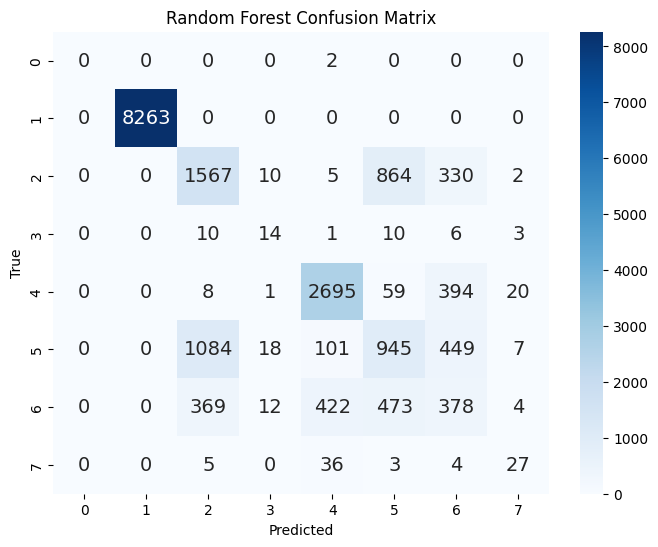

In [16]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Creating Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predicting on the test set
y_pred_rf = model.predict(X_test_normalized)

accuracy = accuracy_score(y_test, y_pred_rf)
formatted_accuracy = "{:.2%}".format(accuracy)
print(f'Random Forest Accuracy: {formatted_accuracy}')

# Cross-validation
cv_scores_rf = cross_val_score(model, X_train_resampled, y_train_resampled, cv=4, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores_rf)

average_accuracy_rf = cv_scores_rf.mean()
print("Average Accuracy:", "{:.2%}".format(average_accuracy_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

class_report_rf = classification_report(y_test, y_pred_rf, zero_division=1)
print("Classification Report:\n", class_report_rf)

We perform hyperparameter tuning for the Random Forest Classifier using GridSearchCV, train the model with the optimized hyperparameters, and evaluate its accuracy on the test set. Additionally, cross-validation scores are explored to assess the model's performance across multiple subsets of the training data.


Random Forest with hyperparameter tuning accuracy: 77.42%
Cross-Validation Scores: [0.85697542 0.88737453 0.89894512 0.89858448]
Average Accuracy: 88.55%


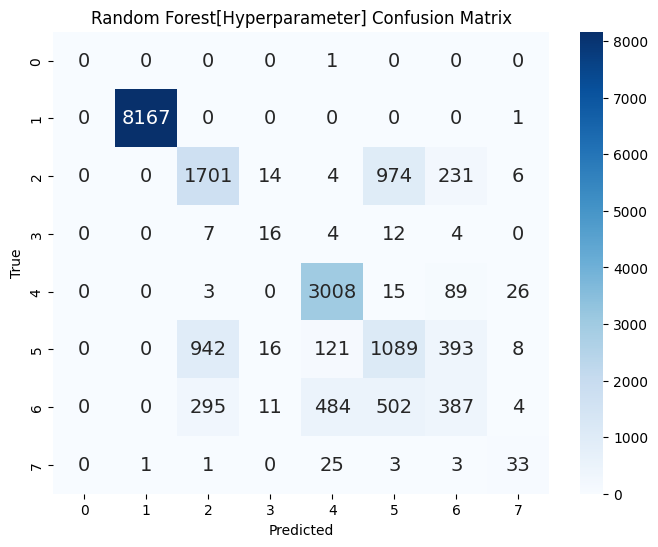

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       1.00      1.00      1.00      8168
           2       0.58      0.58      0.58      2930
           3       0.28      0.37      0.32        43
           4       0.82      0.96      0.89      3141
           5       0.42      0.42      0.42      2569
           6       0.35      0.23      0.28      1683
           7       0.42      0.50      0.46        66

    accuracy                           0.77     18601
   macro avg       0.61      0.51      0.49     18601
weighted avg       0.76      0.77      0.77     18601



In [20]:
# Random Forest with hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [500, 600, 700],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_model = RandomForestClassifier(**best_params, random_state=42)

best_rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = best_rf_model.predict(X_test_normalized)

accuracy = accuracy_score(y_test, y_pred_rf)
formatted_accuracy = "{:.2%}".format(accuracy)
print(f'Random Forest with hyperparameter tuning accuracy: {formatted_accuracy}')

# Cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_resampled, y_train_resampled, cv=4, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

print("Average Accuracy:", "{:.2%}".format(cv_scores.mean())) # change the format

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.title('Random Forest[Hyperparameter] Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

class_report_rf = classification_report(y_test, y_pred_rf, zero_division=1)
print("Classification Report:\n", class_report_rf)

## Logistic Regression

We train a Logistic Regression model on the resampled training set, make predictions on the test set, and evaluate its accuracy.

Accuracy: 77.93%
Cross-Validation Scores: [0.76106755 0.77650784 0.77658323 0.77750302]
Average Accuracy: 77.29%


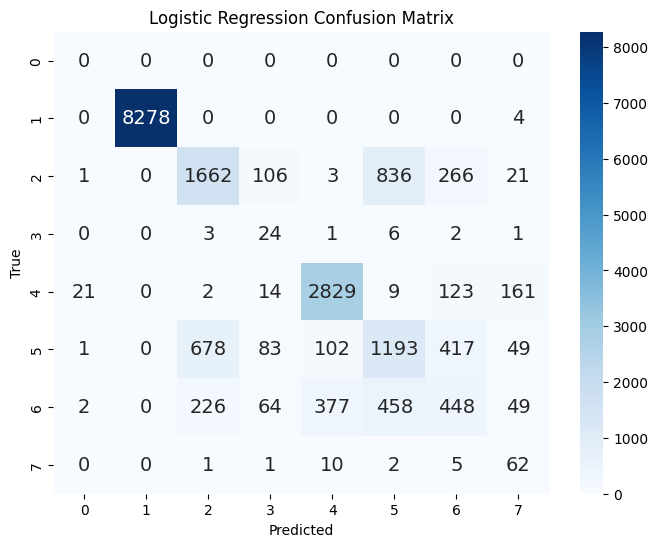

Classification Report:
               precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       1.00      1.00      1.00      8282
           2       0.65      0.57      0.61      2895
           3       0.08      0.65      0.15        37
           4       0.85      0.90      0.87      3159
           5       0.48      0.47      0.47      2523
           6       0.36      0.28      0.31      1624
           7       0.18      0.77      0.29        81

    accuracy                           0.78     18601
   macro avg       0.45      0.70      0.46     18601
weighted avg       0.79      0.78      0.78     18601



In [21]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42, max_iter=4000)
logreg_model.fit(X_train_resampled, y_train_resampled)

y_pred = logreg_model.predict(X_test_normalized)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

# Cross-validation
cv_scores = cross_val_score(logreg_model, X_train_resampled, y_train_resampled, cv=4, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Scores:", cv_scores)

average_accuracy = cv_scores.mean()
print("Average Accuracy:", "{:.2%}".format(average_accuracy))

conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

class_report = classification_report(y_test, y_pred, zero_division=1)
print('Classification Report:\n', class_report)

We perform hyperparameter tuning for the Logistic Regression model using GridSearchCV, find the best hyperparameters, and evaluate the model's accuracy.

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 77.47%
Cross-Validation Scores: [0.76177135 0.77341467 0.77570417 0.77840036]
Average Accuracy: 77.23%


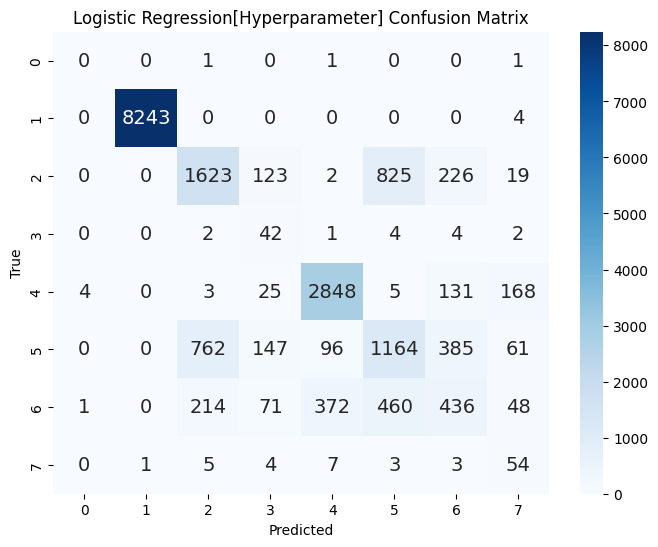

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      1.00         3
           1       1.00      1.00      1.00      8247
           2       0.62      0.58      0.60      2818
           3       0.10      0.76      0.18        55
           4       0.86      0.89      0.87      3184
           5       0.47      0.45      0.46      2615
           6       0.37      0.27      0.31      1602
           7       0.15      0.70      0.25        77

    accuracy                           0.77     18601
   macro avg       0.45      0.58      0.58     18601
weighted avg       0.78      0.77      0.78     18601



In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=4000)

# Define hyperparameter grid
param_grid = {
    'C': [1, 10],
    'penalty': ['none', 'l2']
}

grid_search = GridSearchCV(logreg_model, param_grid, cv=4, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_logreg_model = LogisticRegression(**best_params, random_state=42, max_iter=4000)

best_logreg_model.fit(X_train_resampled, y_train_resampled)

y_pred = best_logreg_model.predict(X_test_normalized)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

# Cross-validation
cv_scores = cross_val_score(logreg_model, X_train_resampled, y_train_resampled, cv=4, scoring='accuracy', n_jobs=-1, error_score='raise')

print("Cross-Validation Scores:", cv_scores)

average_accuracy = cv_scores.mean()
print("Average Accuracy:", "{:.2%}".format(average_accuracy))

conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.title('Logistic Regression[Hyperparameter] Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

class_report = classification_report(y_test, y_pred, zero_division=1)
print('Classification Report:\n', class_report)


## K-Neighbors Classifier

We create and train a K-Neighbors Classifier (KNN) model, make predictions, and evaluate its accuracy.

K-Neighbors Classifier Accuracy: 73.22%
Cross-Validation Scores: [0.8531556  0.86686248 0.88269318 0.88249736]
Average Accuracy: 87.13%


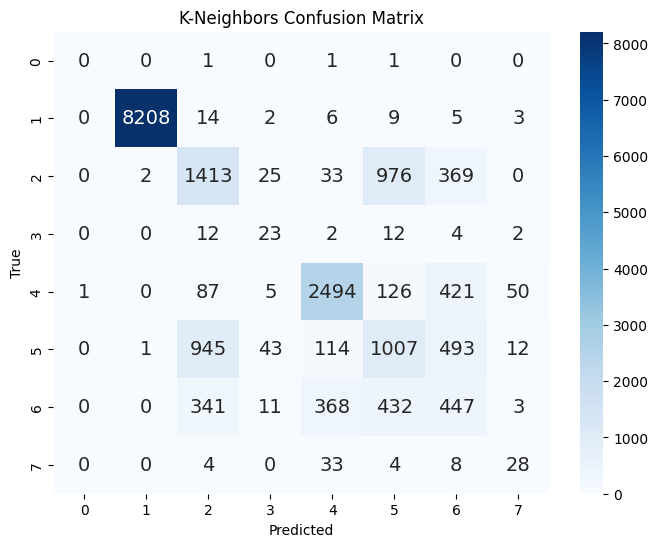

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      1.00         3
           1       1.00      1.00      1.00      8247
           2       0.50      0.50      0.50      2818
           3       0.21      0.42      0.28        55
           4       0.82      0.78      0.80      3184
           5       0.39      0.39      0.39      2615
           6       0.26      0.28      0.27      1602
           7       0.29      0.36      0.32        77

    accuracy                           0.73     18601
   macro avg       0.43      0.47      0.57     18601
weighted avg       0.74      0.73      0.74     18601



In [15]:
# K-Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)

y_pred_knn = knn_model.predict(X_test_normalized)

accuracy = accuracy_score(y_test, y_pred_knn)
formatted_accuracy = "{:.2%}".format(accuracy)
print(f'K-Neighbors Classifier Accuracy: {formatted_accuracy}')

# Cross-validation
cv_scores_knn = cross_val_score(knn_model, X_train_resampled, y_train_resampled, cv=4, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Scores:", cv_scores_knn)

average_accuracy_knn = cv_scores_knn.mean()
print("Average Accuracy:", "{:.2%}".format(average_accuracy_knn))

conf_matrix_rf = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.title('K-Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

class_report_rf = classification_report(y_test, y_pred_knn, zero_division=1)
print("Classification Report:\n", class_report_rf)

## Gradient Boosting Classifier

We create and train a Gradient Boosting Classifier model, make predictions, and evaluate its accuracy.

Gradient Boosting Classifier Accuracy: 79.16%


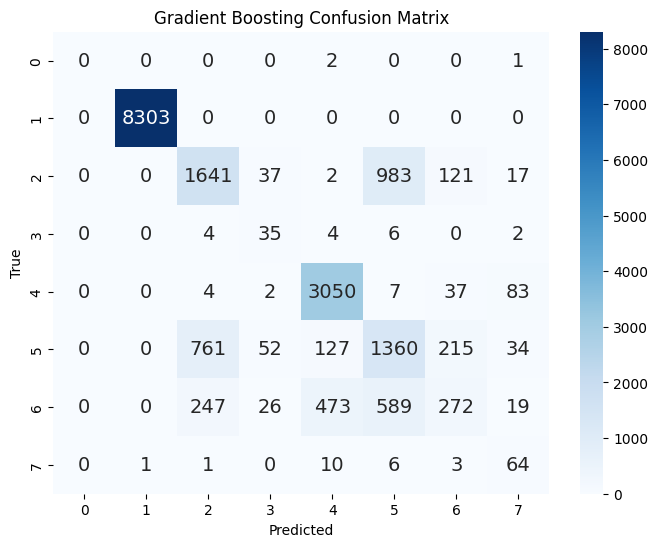

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         3
           1       1.00      1.00      1.00      8303
           2       0.62      0.59      0.60      2801
           3       0.23      0.69      0.34        51
           4       0.83      0.96      0.89      3183
           5       0.46      0.53      0.49      2549
           6       0.42      0.17      0.24      1626
           7       0.29      0.75      0.42        85

    accuracy                           0.79     18601
   macro avg       0.61      0.59      0.50     18601
weighted avg       0.78      0.79      0.78     18601



In [17]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

y_pred_gb = gb_model.predict(X_test_normalized)

accuracy = accuracy_score(y_test, y_pred_gb)
formatted_accuracy = "{:.2%}".format(accuracy)
print(f'Gradient Boosting Classifier Accuracy: {formatted_accuracy}')

# Cross-validation
cv_scores_gb = cross_val_score(gb_model, X_train_resampled, y_train_resampled, cv=4, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Scores:", cv_scores_gb)

average_accuracy_gb = cv_scores_gb.mean()
print("Average Accuracy:", "{:.2%}".format(average_accuracy_gb))

conf_matrix_rf = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

class_report_rf = classification_report(y_test, y_pred_gb, zero_division=1)
print("Classification Report:\n", class_report_rf)

## Result

In this project, we applied machine learning algorithms to predict injury severity in traffic accidents using the Fatality Analysis Reporting System (FARS) dataset. We explored the performance of several machine learning models, including XGBoost, Random Forest, Support Vector Machine (SVM), K-Neighbors, and Gradient Boosting, in predicting injury_severity. Hyperparameter tuning was employed to optimize the model parameters, resulting in improved accuracy and predictive power. Cross-validation score were calculated to assess the model's stability and generalization capabilities. To address class imbalance, oversampling using the Synthetic Minority Over-sampling Technique (SMOTE) was applied, leading to enhanced model performance. Feature selection techniques were also employed to identify key features contributing to predictive accuracy, and the performance was evaluated using key metrics such as accuracy, precision, recall, and F1 score. The results showed variations in the predictive capabilities of the models. XGBoost emerged as the top-performing algorithm, achieving an accuracy of 80.23%. Random Forest also demonstrated competitive results with an accuracy of 77.42%. Overall, this study provides valuable insights into the application of machine learning techniques, paving the way for future enhancements and applications.

## Discussion

A comprehensive analysis of the machine learning project's outcomes, focusing on the predictive performance of the diverse classification algorithms, the impact of strategies employed, such as hyperparameter tuning and cross-validation, and the practical implcations of our findings.

| Algorithm           | Accuracy | Cross-Validation |
|----------------------|----------|------------------|
| XGBoost              | 80.23    | 81.32            |
| RandomForest         | 77.42    | 88.55            |
| Logistic Regression  | 77.93    | 77.29            |
| K-Neighbors          | 72.94    | 87.13            |
| Gradient Boosting    | 79.16    | 78.00            |

The exploration of the XGBoost model revealed its robustness in capturing intricate relationships within the data, resulting in a commendable level of accuracy. Hyperparameter tuning significantly optimized its parameters, improving its ability to generalize effectively to unseen data. Cross-validation scores affirmed the model's consistency across various folds, highlighting its robust performance.

Random Forest, another ensemble method, showed its competitive and stable performance. Cross-validation reinforced its reliability, indicating consistent performance across different subsets of the data.

K-Neighbors, an effective algorithm, delivered reasonable results. Cross-validation scores suggested stable performance, although with a slightly lower average accuracy compared to other models.

Logistic Regression, known for its simplicity and interpretability, demonstrated a decent accuracy. Cross-validation scores underscored its stability, providing confidence in its reliability across different training and test subsets.

Gradient Boosting, characterized by its sequential learning process, exhibited strong capabilities. Cross-validation scores confirmed its stability. However, the computational cost associated with training Gradient Boosting models should be considered, especially for larger datasets.

Throughout our analysis, The significance of hyperparameter tuning in optimizing model performance. The process allowed us to identify configurations which gives us the balance between underfitting and overfitting, resulting in models that generalize well to new data. Cross-validation provided valuable insights into the models' robustness, helping us assess their performance across different subsets of the dataset.

In conclusion, our discussion not only interprets the performance metrics and outcomes of our models but also provides a understanding of their behavior. We reflect on the practical implications of our findings, considering potential use cases and areas for improvement.